# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegressionCV, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, auc
from sklearn.linear_model import LogisticRegressionCV

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

In [41]:
# Загрузка данных
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [42]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Линейная регрессия
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

In [44]:
# Модели с регуляризацией
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)

In [45]:
# Полиномиальная регрессия
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [46]:
# Проверяем размеры массивов
predictions = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Polynomial Regression": y_pred_poly,
}

for model_name, y_pred in predictions.items():
    print(f"{model_name}:")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print()

Linear Regression:
R2: 0.4773
MSE: 2821.7510
MAE: 41.9194

Ridge Regression:
R2: 0.4233
MSE: 3112.9664
MAE: 45.4635

Lasso Regression:
R2: 0.3619
MSE: 3444.6708
MAE: 49.2079

Polynomial Regression:
R2: 0.4130
MSE: 3168.9304
MAE: 44.2214



In [47]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge регрессия на масштабированных данных
ridge_model_scaled = Ridge()
ridge_model_scaled.fit(X_train_scaled, y_train)
y_pred_ridge_scaled = ridge_model_scaled.predict(X_test_scaled)

# Lasso регрессия на масштабированных данных
lasso_model_scaled = Lasso()
lasso_model_scaled.fit(X_train_scaled, y_train)
y_pred_lasso_scaled = lasso_model_scaled.predict(X_test_scaled)

In [48]:
# Проверяем размеры массивов
predictions = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge_scaled,
    "Lasso Regression": y_pred_lasso_scaled,
    "Polynomial Regression": y_pred_poly,
}

for model_name, y_pred in predictions.items():
    print(f"{model_name}:")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print()

Linear Regression:
R2: 0.4773
MSE: 2821.7510
MAE: 41.9194

Ridge Regression:
R2: 0.4776
MSE: 2819.9820
MAE: 41.8784

Lasso Regression:
R2: 0.4842
MSE: 2784.3344
MAE: 41.8644

Polynomial Regression:
R2: 0.4130
MSE: 3168.9304
MAE: 44.2214



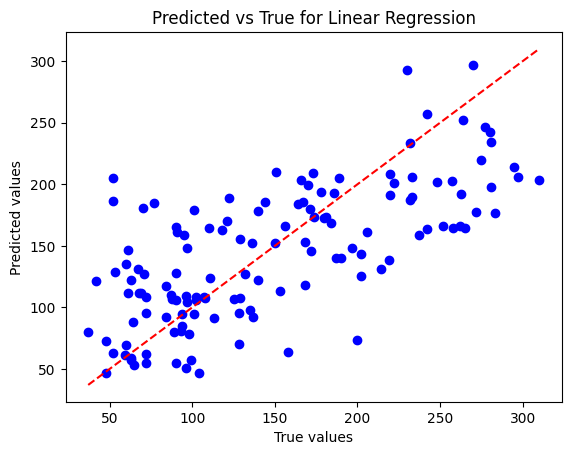

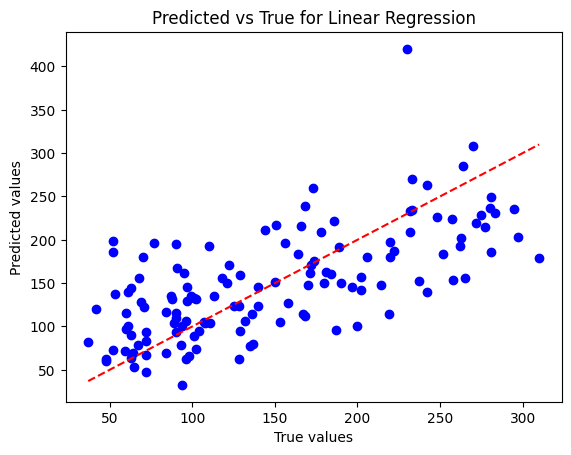

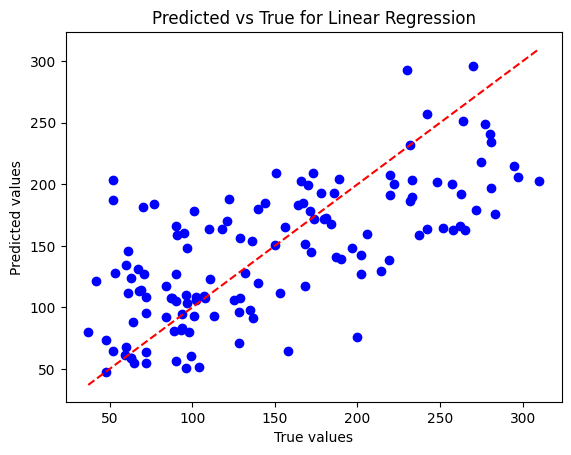

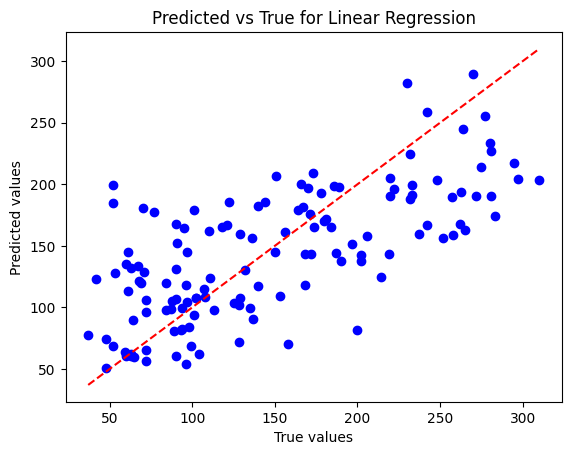

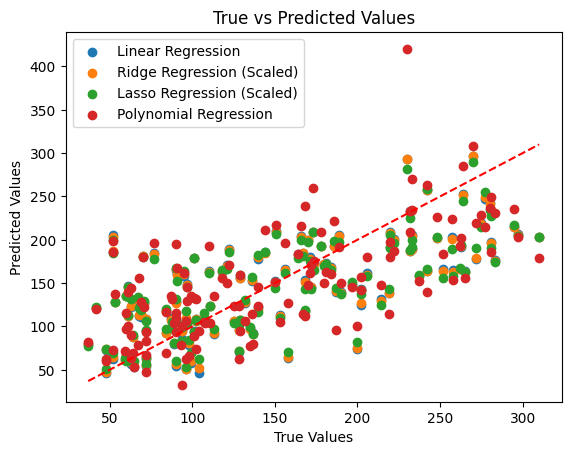

In [49]:
# Построение графика "предсказанные против истинных" значений для Linear Regression
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение графика "предсказанные против истинных" значений для Polynomial Regression
plt.scatter(y_test, y_pred_poly, color='blue', label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение графика "предсказанные против истинных" значений для Ridge
plt.scatter(y_test, y_pred_ridge_scaled, color='blue', label='Ridge')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение графика "предсказанные против истинных" значений для Lasso
plt.scatter(y_test, y_pred_lasso_scaled, color='blue', label='Lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True for Linear Regression')
plt.show()

# Построение scatterplot
plt.scatter(y_test, y_pred_lr, label="Linear Regression")
plt.scatter(y_test, y_pred_ridge_scaled, label="Ridge Regression (Scaled)")
plt.scatter(y_test, y_pred_lasso_scaled, label="Lasso Regression (Scaled)")
plt.scatter(y_test, y_pred_poly, label="Polynomial Regression")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

Линейная регрессия показала базовый результат с R² = 0.4773, MSE = 2821.7510, MAE = 41.9194. Ridge регрессия улучшила результаты (R² = 0.4776, MSE = 2819.9820), а Lasso регрессия показала наилучшие показатели (R² = 0.4842, MSE = 2784.3344), благодаря отбору признаков и уменьшению мультиколлинеарности. Полиномиальная регрессия дала худшие результаты (R² = 0.4130, MSE = 3168.9304). Масштабирование улучшило результаты моделей с регуляризацией, особенно Lasso. Вывод: Lasso регрессия показала наилучшие результаты среди всех моделей для данного задания.

2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [50]:
# Загрузка данных
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [51]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Параметры для кросс-валидации
C_values = np.logspace(-4, 4, 20)

In [54]:
# Логистическая регрессия с кросс-валидацией для выбора C
cv = StratifiedKFold(n_splits=5)
logistic_model = LogisticRegressionCV(Cs=C_values, cv=cv, scoring='roc_auc', max_iter=10000, multi_class='ovr')
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1912: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                     max_iter=10000, multi_class='ovr', scoring='roc_auc')

In [55]:
# Средние значения ROC-AUC для каждого значения C
mean_scores = logistic_model.scores_[1].mean(axis=0)
optimal_C = logistic_model.C_[0]

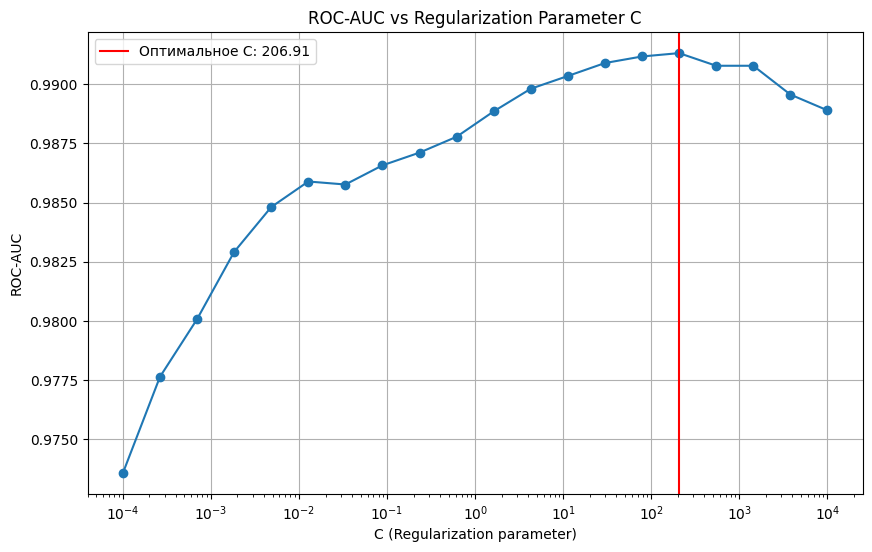

In [56]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, mean_scores, marker='o')
plt.axvline(optimal_C, color='r', label=f'Оптимальное C: {optimal_C:.2f}')

plt.xlabel("C (Regularization parameter)")
plt.ylabel("ROC-AUC")
plt.title("ROC-AUC vs Regularization Parameter C")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Оптимальное значение C
optimal_C = logistic_model.C_[0]
print(f"Оптимальное значение C: {optimal_C}")

Оптимальное значение C: 206.913808111479


In [59]:
# Получение вероятностей для положительного класса
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Вычисление метрики ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.5f}")

ROC-AUC: 0.99633


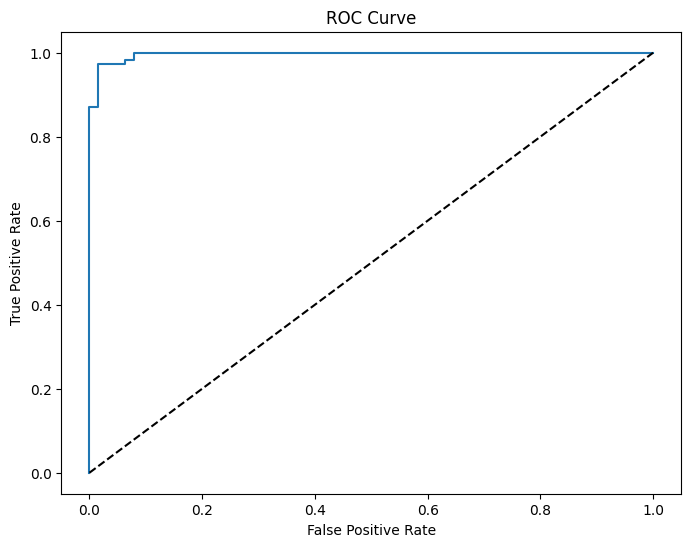

In [60]:
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

С использованием LogisticRegressionCV был проведён поиск оптимального значения параметра регуляризации C, что позволило определить его влияние на метрику ROC-AUC. График зависимости ROC-AUC от параметра C показал, что при малых значениях C (сильная регуляризация) модель недообучалась, что приводило к низкому значению ROC-AUC. С увеличением C ROC-AUC улучшался, достигая максимума, после чего стабилизировался, что указывает на риск переобучения. Оптимальное значение C было найдено в точке максимума ROC-AUC, и его значение составило 206.91. На тестовых данных модель с этим параметром показала ROC-AUC 0.99633.
Также была построена ROC-кривая, иллюстрирующая высокое качество классификации модели. Таким образом, оптимизация параметра C позволила добиться практически идеального качества модели с точки зрения метрики ROC-AUC.

3. Выбрать порог классификации для LogisticRegression на основе метрики

In [61]:
# Обучение логистической регрессии с оптимальным C из предыдущего шага
logistic_model_optimal = LogisticRegression(C=optimal_C, max_iter=10000)
logistic_model_optimal.fit(X_train, y_train)

LogisticRegression(C=206.913808111479, max_iter=10000)

In [62]:
# Обучение логистической регрессии с оптимальным C из предыдущего шага
logistic_model_optimal = LogisticRegression(C=optimal_C, max_iter=10000)
logistic_model_optimal.fit(X_train, y_train)
y_pred_proba_train = logistic_model_optimal.predict_proba(X_train)[:, 1]

In [63]:
# Определение порога на основе метрики F1
thresholds = np.linspace(0, 1, 50)
y_pred_proba_train = logistic_model_optimal.predict_proba(X_train)[:, 1]  # Вероятности класса 1

In [64]:
# Нахождение порога, при котором F1-score - максимальное
f1_scores = [f1_score(y_train, y_pred_proba_train >= threshold) for threshold in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]

In [69]:
# Предсказания для тестовых данных с использованием оптимального порога
y_pred_proba_test = logistic_model_optimal.predict_proba(X_test)[:, 1]  # Вероятности класса 1
y_pred_test = (y_pred_proba_test >= optimal_threshold).astype(int)

# Оценка качества модели на тестовых данных
f1_test = f1_score(y_test, y_pred_test)

print(f'На тестовых данных с порогом {optimal_threshold:.4f}:')
print(f'F1-Score: {f1_test:.4f}')

На тестовых данных с порогом 0.5714:
F1-Score: 0.9813


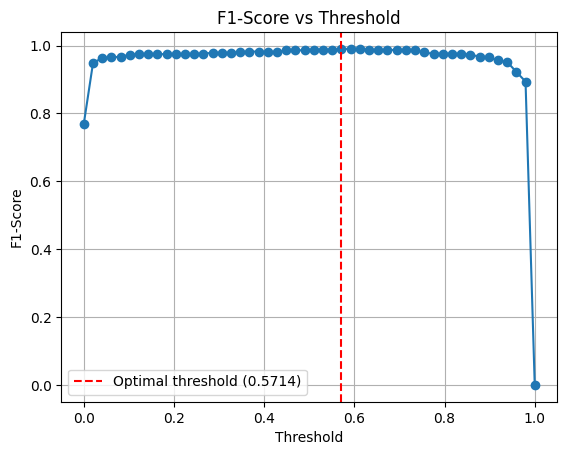

При оптимальном пороге классификации: 0.5714 достигается F1-Score = 0.9899


In [67]:
# Построение графика зависимости F1 от порога
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal threshold ({optimal_threshold:.4f})')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid()
plt.show()

print(f'При оптимальном пороге классификации: {optimal_threshold:.4f} достигается F1-Score = {max(f1_scores):.4f}')

На тренировочных данных оптимальный порог классификации составил 0.5714. При этом пороге достигается высокий F1-score = 0.9813, что указывает на практически идеальное качество модели на тренировочных данных.

Применение того же порога к тестовым данным дало следующие результаты:
F1-score: 0.9813

Эти метрики свидетельствуют о том, что модель хорошо обобщает данные и не переобучилась.

В итоге был проведён поиск оптимального значения параметра регуляризации
𝐶
C для модели LogisticRegressionCV. На основе ROC-AUC метрики было выбрано оптимальное значение
𝐶
C. Затем, с помощью F1-метрики, определён оптимальный порог классификации, что позволило достичь высоких показателей качества модели.